In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))
import pandas as pd
from scripts.correlation_analysis import CorrelationAnalysis

- **Load the Data**

In [2]:
df_news = pd.read_csv("../data/raw_analyst_ratings.csv")
df_stock = pd.read_csv("../data/yfinance_data/MSFT_historical_data.csv")
# Drop the auto-generated column 
df_news = df_news.drop(columns=['Unnamed: 0'])
print(df_news.columns)
print(df_stock.columns)
ca = CorrelationAnalysis(df_news,df_stock)

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


- Converting to the appropriate format

In [3]:
ca.normalize_date()

In [4]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [5]:

df_news.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


### **Sentiment Analysis**

In [6]:
# Function to classify sentiment
ca.sentiment_analysis()

Aggregate Sentiment

In [7]:
# Group by date and compute average sentiment
ca.aggregate_sentiment()

,headline,url,publisher,date,stock,sentiment,avg_sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,0.0,0.110735
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,0.0,0.073184
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,0.0,0.079446
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,0.0,0.062068
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,0.0,0.062068


### **Date Alignment**

In [8]:
ca.align_date()



,headline,url,publisher,stock,sentiment,avg_sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.000000,0.110735,2020-06-05,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.00,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.000000,0.073184,2020-06-03,184.820007,185.940002,183.580002,185.360001,178.630417,27311000,0.00,0.0
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.000000,0.079446,2020-05-26,186.339996,186.500000,181.100006,181.570007,174.977966,36073600,0.00,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.000000,0.062068,2020-05-22,183.190002,184.460007,182.539993,183.509995,176.847519,20826900,0.00,0.0
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.000000,0.062068,2020-05-22,183.190002,184.460007,182.539993,183.509995,176.847519,20826900,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55225,Chinese Nano-Cap Momentum Stocks Sharply Highe...,https://www.benzinga.com/movers/18/01/10994518...,Paul Quintaro,ZX,0.046591,-0.001166,2018-01-05,87.660004,88.410004,87.430000,88.190002,81.872475,23407100,0.00,0.0
55226,28 Stocks Moving In Wednesday's Pre-Market Ses...,https://www.benzinga.com/news/17/12/10878295/2...,Lisa Levin,ZX,0.000000,0.091477,2017-12-06,81.550003,83.139999,81.430000,82.779999,76.850014,26162100,0.00,0.0
55227,China Zenix Auto International Reports Q3 EPAD...,https://www.benzinga.com/news/earnings/17/12/1...,Paul Quintaro,ZX,0.000000,0.091477,2017-12-06,81.550003,83.139999,81.430000,82.779999,76.850014,26162100,0.00,0.0
55228,46 Biggest Movers From Yesterday,https://www.benzinga.com/news/17/11/10788120/4...,Lisa Levin,ZX,0.000000,0.051870,2017-11-15,83.470001,83.690002,82.690002,82.980003,77.035675,19383100,0.42,0.0


### **Analysis**

In [9]:
# Calculate daily stock returns as the percentage change in closing prices

ca.calculate_correlation()

Correlation between avg_sentiment and daily return: -0.02018448452605466


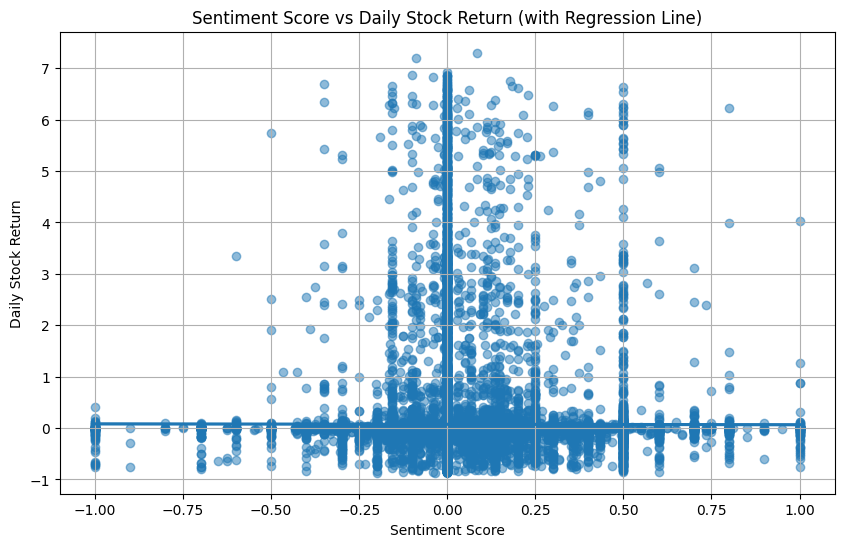

In [10]:
ca.plot_sentiment_vs_daily()

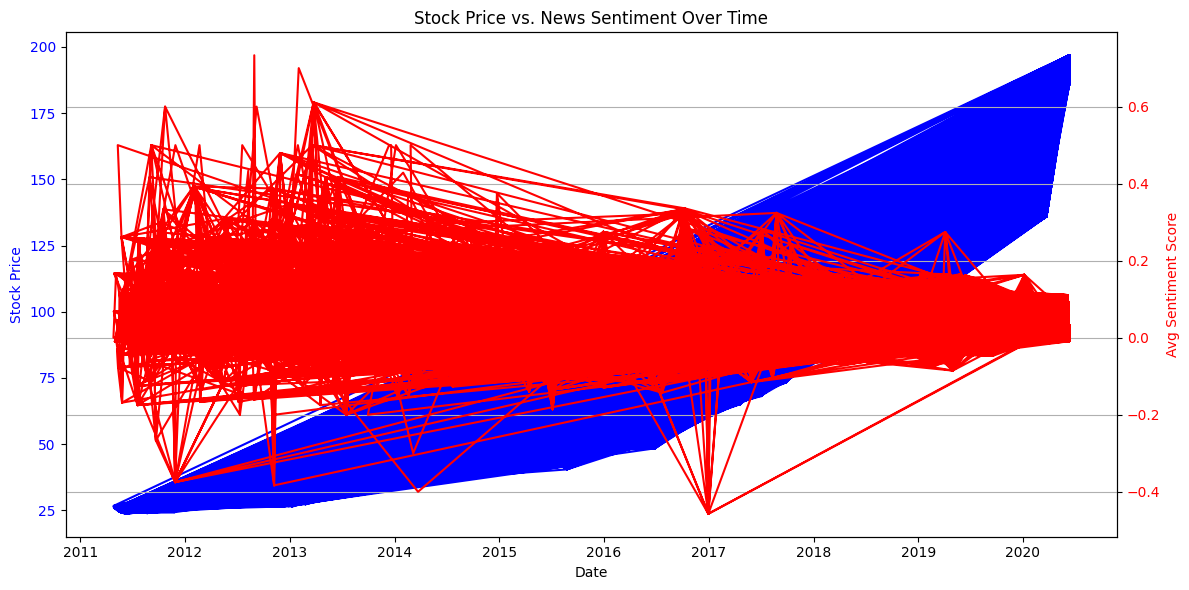

In [11]:
ca.plot_change()
